# Load Libraries/Modules

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as cbrn
import matplotlib.pyplot as plt

# Data Metric and Processing Metrics

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import classification_report, accuracy_score, confusion_matrix
from patsy import dmatrices

# Import Modules for Modelling

# Linear Regression
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# XGBoost
#import xgboost as xgb

# Stylistic

cbrn.set(style = 'ticks', palette = 'Set2')
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\Faizan\\OneDrive\\OneDrive\\Statistical Cnslt and Tutoring\\ML_Jewerly_Clustering'

# Import Dataset

In [4]:
oj_raw = pd.read_csv('OJ.csv')

In [5]:
oj_raw

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


# Inspect Data Set

In [6]:
# To avoid scrolling through the above, the entire array will be printed to better gauge the available columns

oj_raw.columns.values

array(['Unnamed: 0', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'], dtype=object)

In [7]:
# Remove the Unnamed Column

oj_nopulp = oj_raw.drop(columns = ['Unnamed: 0'])
oj_nopulp.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [8]:
oj_nopulp.columns.values

array(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM',
       'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'], dtype=object)

In [9]:
oj_nopulp.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


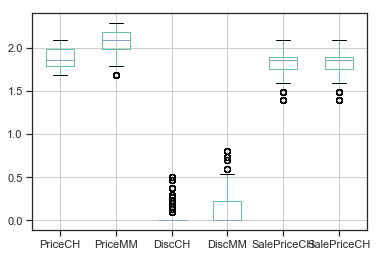

In [10]:
# Visualize Data to Assess Any Outliers

oj_nopulp.boxplot(column=['PriceCH','PriceMM','DiscCH','DiscMM','SalePriceCH','SalePriceCH'])

In [10]:
# print(oj_nopulp.shape)

In [11]:
# Double check that code above works

oj_nopulp.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [13]:
oj_nopulp.to_csv(r'oj_nopulp.csv', index = None, header=True)

# Scaling/Encoding the Data

In [14]:
# Import libraries and download example data
dataset = oj_nopulp

# Define which columns should be encoded vs scaled
columns_to_encode = ['Purchase', 'SpecialCH', 'SpecialMM', 'STORE',
                     'Store7','StoreID','WeekofPurchase']

columns_to_scale  = ['DiscCH', 'DiscMM','ListPriceDiff','LoyalCH',
                     'PctDiscCH','PctDiscMM','PriceCH','PriceDiff',
                     'PriceMM','SalePriceCH','SalePriceMM']

# Instantiate encoder/scaler
scaler = MinMaxScaler(feature_range = (0,1))
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
encoded_columns =    ohe.fit_transform(dataset[columns_to_encode])
scaled_columns  = scaler.fit_transform(dataset[columns_to_scale]) 

print("Encoded Columns")
print(encoded_columns)
print(encoded_columns.shape)

print("")

print("Scaled Columns")
print(scaled_columns)
print(scaled_columns.shape)

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

Encoded Columns
[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
(1070, 70)

Scaled Columns
[[0.         0.         0.54545455 ... 0.5        0.51428571 0.72727273]
 [0.         0.375      0.54545455 ... 0.5        0.51428571 0.45454545]
 [0.34       0.         0.52272727 ... 0.66666667 0.42857143 0.81818182]
 ...
 [0.         0.         0.72727273 ... 0.81666667 0.67142857 0.9       ]
 [0.         0.3        0.61363636 ... 0.73333333 0.67142857 0.63636364]
 [0.         0.         0.72727273 ... 0.81666667 0.67142857 0.9       ]]
(1070, 11)


In [15]:
X = pd.DataFrame(processed_data)

In [16]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.00,0.000,0.545455,0.500021,0.000000,0.000000,0.150,0.694656,0.500000,0.514286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.375,0.545455,0.600027,0.000000,0.375001,0.150,0.465649,0.500000,0.514286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.34,0.000,0.522727,0.680033,0.361703,0.000000,0.425,0.816794,0.666667,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.000,0.000000,0.400015,0.000000,0.000000,0.000,0.511450,0.000000,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.000,0.000000,0.956585,0.000000,0.000000,0.000,0.511450,0.000000,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X.to_csv(r'X.csv', index = None, header=True)

# Split Data into Training, Validation, Testing

In [18]:
y = oj_nopulp['Purchase']

In [19]:
model = X,y

In [20]:
print(model)

(        0      1         2         3         4         5      6         7   \
0     0.00  0.000  0.545455  0.500021  0.000000  0.000000  0.150  0.694656   
1     0.00  0.375  0.545455  0.600027  0.000000  0.375001  0.150  0.465649   
2     0.34  0.000  0.522727  0.680033  0.361703  0.000000  0.425  0.816794   
3     0.00  0.000  0.000000  0.400015  0.000000  0.000000  0.000  0.511450   
4     0.00  0.000  0.000000  0.956585  0.000000  0.000000  0.000  0.511450   
5     0.00  0.000  0.681818  0.965279  0.000000  0.000000  0.000  0.740458   
6     0.00  0.500  0.681818  0.972233  0.000000  0.500000  0.000  0.435115   
7     0.00  0.500  0.545455  0.977798  0.000000  0.500000  0.150  0.389313   
8     0.00  0.500  0.545455  0.982249  0.000000  0.500000  0.150  0.389313   
9     0.00  0.500  0.545455  0.985809  0.000000  0.500000  0.150  0.389313   
10    0.00  0.000  0.522727  0.988658  0.000000  0.000000  0.425  0.687023   
11    0.54  0.000  0.613636  0.990937  0.574467  0.000000  0.42

In [21]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

# Model Creation & Optimization

In [22]:
# Writing the evaluation metrics as a function. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Linear Regression

In [23]:
model = LogisticRegression(fit_intercept = False)
mdl = model.fit(X_training, y_training.values.ravel())
model.coef_

y_test_pred = model.predict(X_test)
y_training_pred = model.predict(X_training)

C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Linear Regression Confusion Matrix - Training

In [24]:
confusion_matrix(y_training, y_training)

array([[523,   0],
       [  0, 333]], dtype=int64)

In [25]:
print(classification_report(y_training, y_training_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       523
          MM       1.00      1.00      1.00       333

   micro avg       1.00      1.00      1.00       856
   macro avg       1.00      1.00      1.00       856
weighted avg       1.00      1.00      1.00       856



Linear Regression Confusion Matrix - Test

In [26]:
confusion_matrix(y_test, y_test_pred)

array([[130,   0],
       [  0,  84]], dtype=int64)

In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       130
          MM       1.00      1.00      1.00        84

   micro avg       1.00      1.00      1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



# Random Forest

In [28]:
rf_clf = RandomForestClassifier(n_jobs=2, random_state=42)

# Training the random forest Classifier 
rf_clf.fit(X_training, y_training.values.ravel())

rf_training_pred = rf_clf.predict(X_training)

rf_train_pred = rf_clf.predict(X_train)

rf_test_pred = rf_clf.predict(X_test)

rf_val_pred = rf_clf.predict(X_val)

C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Confusion Matrix - Training

In [29]:
confusion_matrix(y_training, rf_training_pred)

array([[523,   0],
       [  0, 333]], dtype=int64)

In [30]:
print(classification_report(y_training, rf_training_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       523
          MM       1.00      1.00      1.00       333

   micro avg       1.00      1.00      1.00       856
   macro avg       1.00      1.00      1.00       856
weighted avg       1.00      1.00      1.00       856



Random Forest Confusion Matrix - Testing

In [31]:
confusion_matrix(y_test, rf_test_pred)

array([[130,   0],
       [  0,  84]], dtype=int64)

In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       130
          MM       1.00      1.00      1.00        84

   micro avg       1.00      1.00      1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



# Naive Bayes 

In [33]:
nb = GaussianNB()
nb = nb.fit(X_training, y_training.values.ravel())
nb

nb_training_pred = nb.predict(X_training)
nb_test_pred = nb.predict(X_test)

Naive Bayes Confusion Matrix - Testing

In [34]:
confusion_matrix(y_training, nb_training_pred)

array([[523,   0],
       [  0, 333]], dtype=int64)

In [35]:
print(classification_report(y_training, nb_training_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       523
          MM       1.00      1.00      1.00       333

   micro avg       1.00      1.00      1.00       856
   macro avg       1.00      1.00      1.00       856
weighted avg       1.00      1.00      1.00       856



Naive Bayes Confusion - Training

In [36]:
confusion_matrix(y_test, nb_test_pred)

array([[130,   0],
       [  0,  84]], dtype=int64)

In [37]:
print(classification_report(y_test, nb_test_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       130
          MM       1.00      1.00      1.00        84

   micro avg       1.00      1.00      1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



# KNN

In [38]:
k_knn = 10

model_knn =  KNeighborsClassifier(n_neighbors=k_knn)
model_knn.fit(X_training, y_training.values.ravel())

knn_training_pred = model_knn.predict(X_training)
knn_test_pred = model_knn.predict(X_test)

KNN Confusion Matrix - Training

In [39]:
confusion_matrix(y_training, knn_training_pred)

array([[522,   1],
       [  7, 326]], dtype=int64)

In [40]:
print(classification_report(y_training, knn_training_pred))

              precision    recall  f1-score   support

          CH       0.99      1.00      0.99       523
          MM       1.00      0.98      0.99       333

   micro avg       0.99      0.99      0.99       856
   macro avg       0.99      0.99      0.99       856
weighted avg       0.99      0.99      0.99       856



KNN Confusion Matrix - Testing

In [41]:
confusion_matrix(y_test, knn_test_pred)

array([[128,   2],
       [  2,  82]], dtype=int64)

In [42]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

          CH       0.98      0.98      0.98       130
          MM       0.98      0.98      0.98        84

   micro avg       0.98      0.98      0.98       214
   macro avg       0.98      0.98      0.98       214
weighted avg       0.98      0.98      0.98       214



# SVM

In [43]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_training, y_training.values.ravel())

svm_training_pred = svm_model.predict(X_training)
svm_test_pred = svm_model.predict(X_test)

SVM Confusion Matrix - Training

In [44]:
confusion_matrix(y_training, svm_training_pred)

array([[523,   0],
       [  0, 333]], dtype=int64)

In [45]:
print(classification_report(y_training, svm_training_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       523
          MM       1.00      1.00      1.00       333

   micro avg       1.00      1.00      1.00       856
   macro avg       1.00      1.00      1.00       856
weighted avg       1.00      1.00      1.00       856



SVM Confusion Matrix - Testing

In [46]:
confusion_matrix(y_test, svm_test_pred)

array([[130,   0],
       [  0,  84]], dtype=int64)

In [47]:
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

          CH       1.00      1.00      1.00       130
          MM       1.00      1.00      1.00        84

   micro avg       1.00      1.00      1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

